In [ ]:
import kagglehub
uciml_sms_spam_collection_dataset_path = kagglehub.dataset_download('uciml/sms-spam-collection-dataset')


In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [ ]:
import string
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df=pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv",encoding='latin1')

In [ ]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape


(5572, 5)

In [ ]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


/tmp/ipython-input-77-1047797608.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fg = sns.countplot(x= df["v1"], palette= cols)


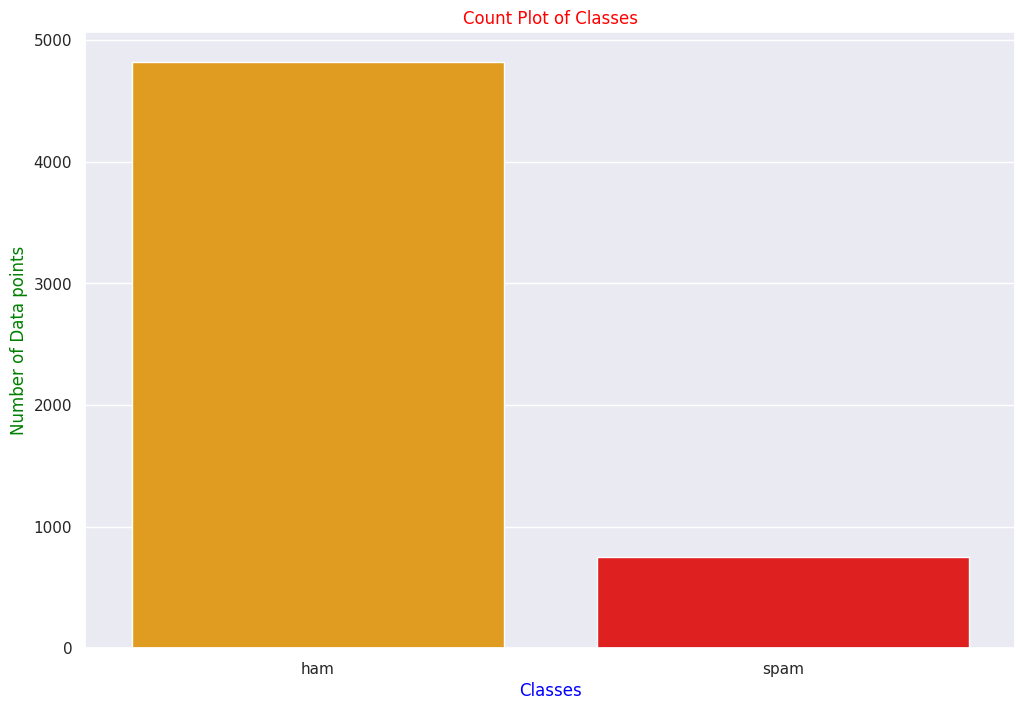

In [ ]:
cols= ["orange", "red"]
plt.figure(figsize=(12,8))
fg = sns.countplot(x= df["v1"], palette= cols)
fg.set_title("Count Plot of Classes", color="red")
fg.set_xlabel("Classes", color="blue")
fg.set_ylabel("Number of Data points", color="green")
plt.show()

In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)


In [ ]:
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()


,0
target,0
text,0


In [ ]:
df.duplicated().sum()


np.int64(403)

In [ ]:
df.drop_duplicates(inplace=True,keep='first')



In [ ]:
df['target'].value_counts()


,count
target,
0,4516
1,653


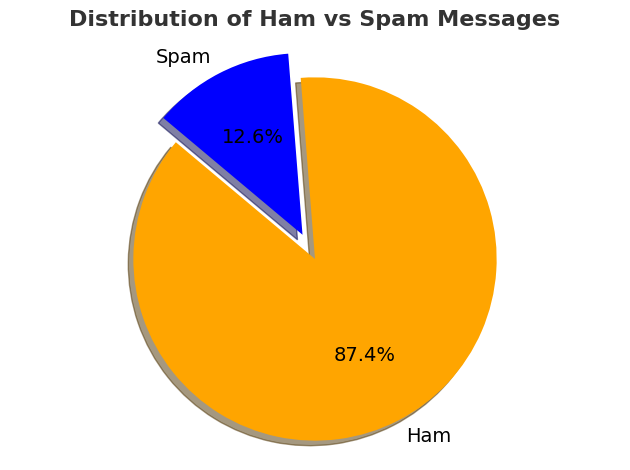

In [ ]:
labels = ['Ham', 'Spam']
sizes = df['target'].value_counts()
colors = ['orange', 'blue']  # pastel blue and red
explode = (0.05, 0.1)  # explode both slices a little
# plt.figure(figsize=(6, 6))

plt.pie(sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        explode=explode,
        shadow=True,
        textprops={'fontsize': 14})

plt.title('Distribution of Ham vs Spam Messages', fontsize=16, fontweight='bold', color='#333333')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

In [ ]:
df['num_characters']=df['text'].apply(len)
df.head()


,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[df['target']==0].describe()


,target,num_characters,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


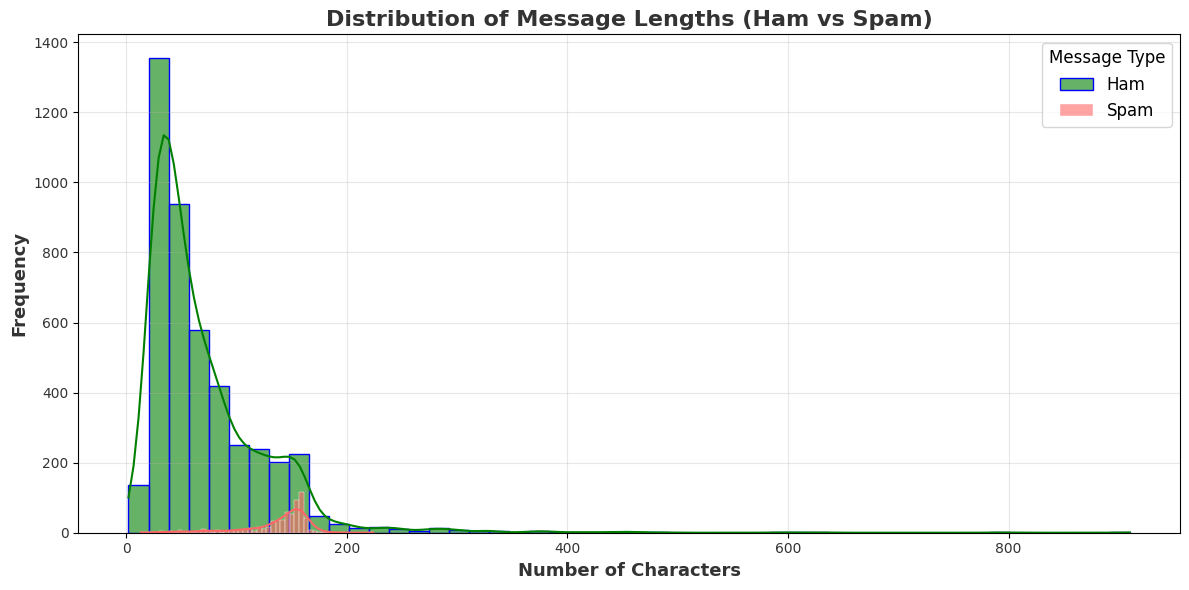

In [ ]:
plt.figure(figsize=(12, 6))

# Plot histograms for ham and spam with pastel blue and red colors
sns.histplot(df[df['target'] == 0]['num_characters'],
             color="green", label='Ham', kde=True,
             edgecolor='blue', alpha=0.6, bins=50)

sns.histplot(df[df['target'] == 1]['num_characters'],
             color="#ff6666", label='Spam', kde=True,
             edgecolor='white', alpha=0.6, bins=50)

# Styling
plt.title("Distribution of Message Lengths (Ham vs Spam)", fontsize=16, fontweight='bold', color="#333333")
plt.xlabel("Number of Characters", fontsize=13, fontweight='bold', color="#333333")
plt.ylabel("Frequency", fontsize=13, fontweight='bold', color="#333333")
plt.legend(title="Message Type", title_fontsize=12, fontsize=12)
plt.grid(alpha=0.3)

# Customize ticks
plt.xticks(color="#333333")
plt.yticks(color="#333333")

# Layout and display
plt.tight_layout()
plt.show()

/tmp/ipython-input-29-1587797680.py:22: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


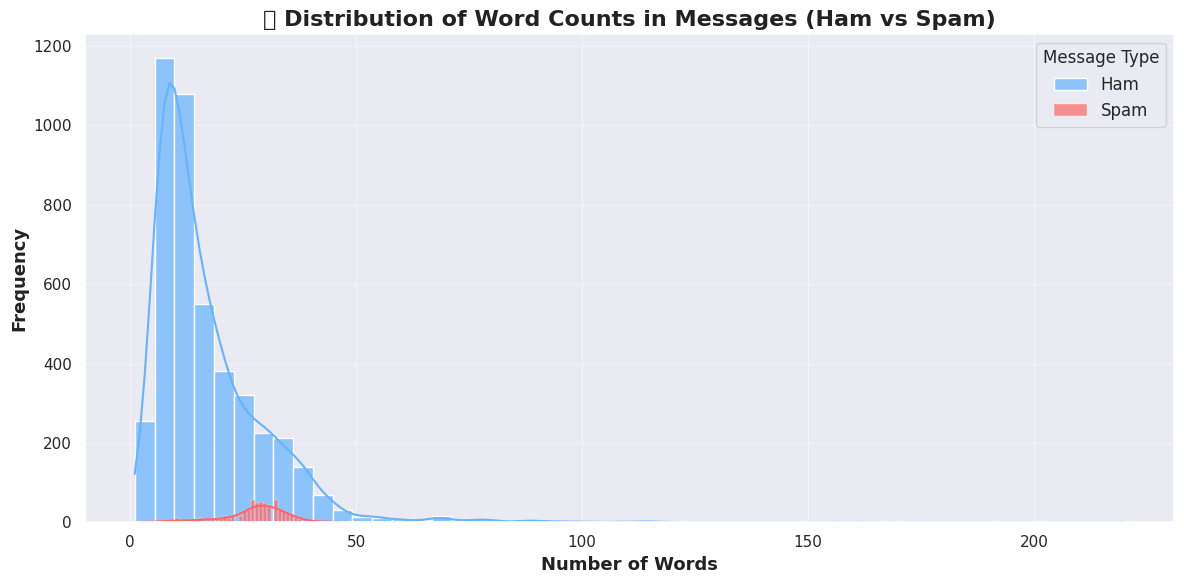

In [ ]:
 #Set Seaborn darkgrid theme for a modern look
sns.set_theme(style="darkgrid")

plt.figure(figsize=(12, 6))

# Plot histograms for ham and spam number of words with pastel colors
sns.histplot(df[df['target'] == 0]['num_words'],
             color="#66b3ff", label='Ham', kde=True,
             edgecolor='white', alpha=0.7, bins=50)

sns.histplot(df[df['target'] == 1]['num_words'],
             color="#ff6666", label='Spam', kde=True,
             edgecolor='white', alpha=0.7, bins=50)

# Styling
plt.title("📊 Distribution of Word Counts in Messages (Ham vs Spam)", fontsize=16, fontweight='bold', color="#222222")
plt.xlabel("Number of Words", fontsize=13, fontweight='bold', color="#222222")
plt.ylabel("Frequency", fontsize=13, fontweight='bold', color="#222222")
plt.legend(title="Message Type", title_fontsize=12, fontsize=12)
plt.grid(alpha=0.4)

plt.tight_layout()
plt.show()


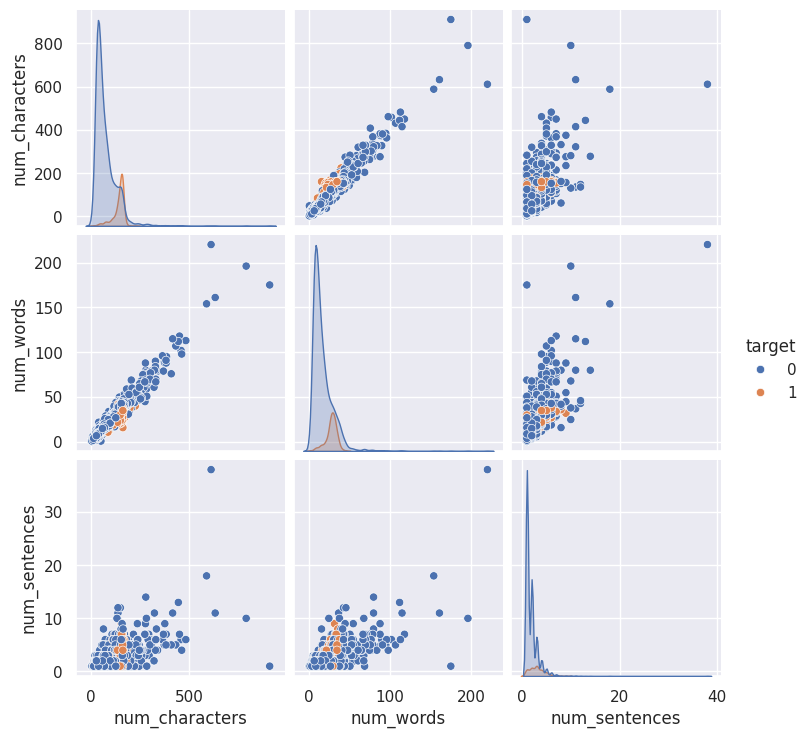

In [ ]:
sns.pairplot(df,hue='target')
plt.show()

In [ ]:
df_numeric=df[['target','num_characters','num_words','num_sentences']]


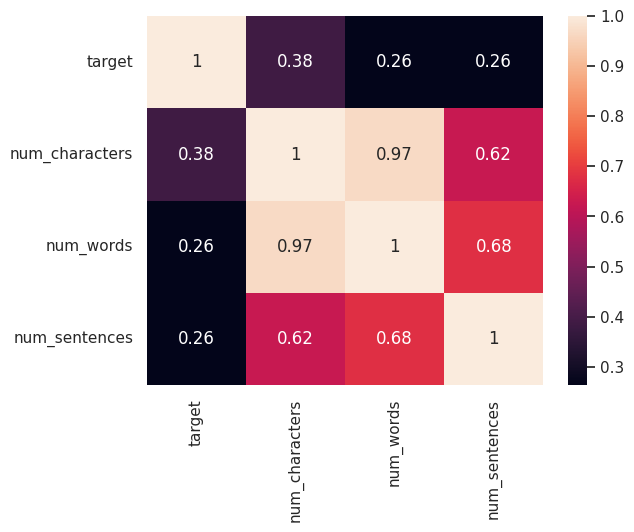

In [ ]:
sns.heatmap(df_numeric.corr(),annot=True)
plt.xticks(rotation=90)
plt.show()

In [ ]:
ps=PorterStemmer()


In [ ]:
def transform_text(text):
     text=text.lower()
     text=nltk.word_tokenize(text)
     y=[]
     for i in text:
         if i.isalnum():
             y.append(i)
     text=y[:]
     y.clear()
     for i in text:
         if i not in stopwords.words('english') and i not in string.punctuation:
             y.append(i)
     text=y[:]
     y.clear()
     for i in text:
         y.append(ps.stem(i))

     return " ".join(y)

In [ ]:
transform_text("Hi, I am mohamed. I  working on Machine Learning projects .")

'hi moham work machin learn project'

In [ ]:
df['transformed_text']=df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))



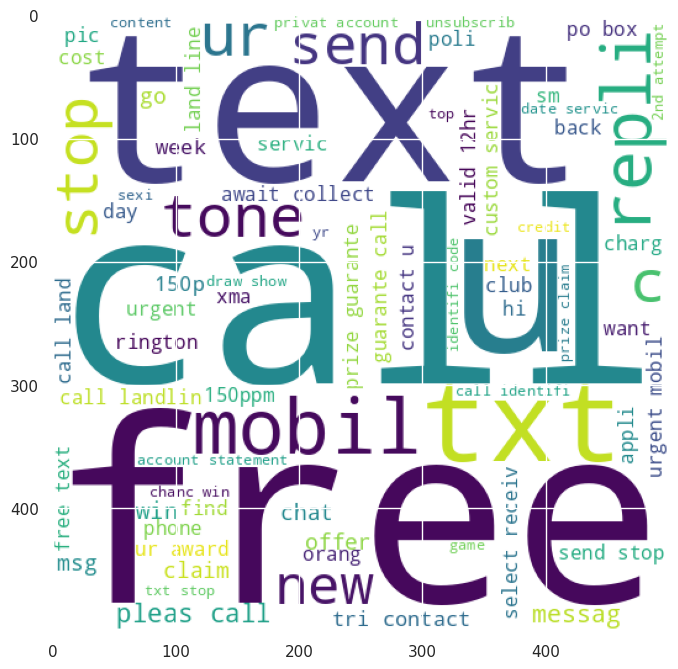

In [ ]:
plt.figure(figsize=(20,8))
plt.imshow(spam_wc )
plt.show()

In [ ]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))

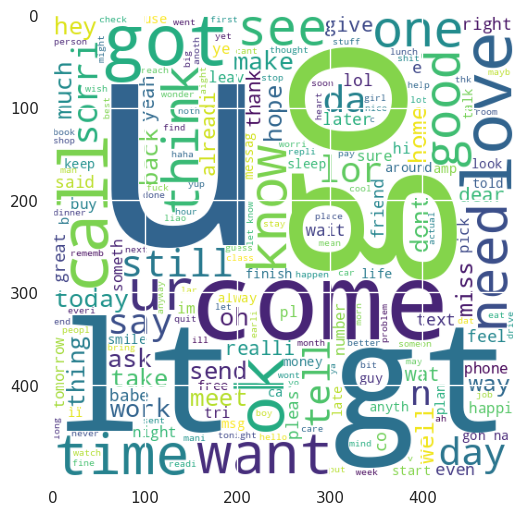

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
plt.show()

In [ ]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)


9939

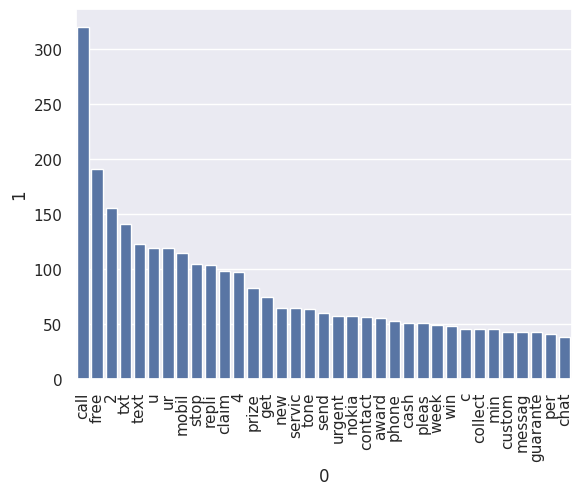

In [ ]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(35))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(35))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)


35404

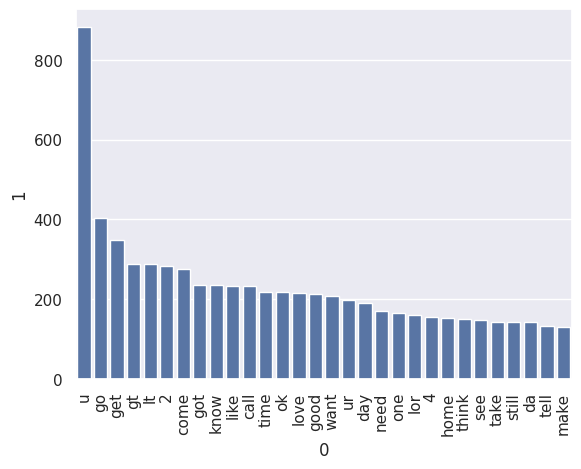

In [ ]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# text vectorization
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape


(5169, 6708)

In [ ]:
y=df['target'].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481
0.9593810444874274
[[896   0]
 [ 42  96]]
1.0
0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=3)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=40, random_state=42)


In [ ]:
clfs = {
    'SVC'     : svc,
    'KN'      : knc,
    'NB'      : mnb,
    'DT'      : dtc,
    'LR'      : lrc,
    'RF'      : rfc,

}

In [ ]:
def train_classifer(clf,X_train,X_test,y_train,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
train_classifer(svc,X_train,X_test,y_train,y_test)

(0.9729206963249516, 0.9741379310344828)

In [ ]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifer(clf,X_train,X_test,y_train,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.7837837837837838
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.9729206963249516
Precision -  0.9910714285714286


In [ ]:
def highlight_row(index):
    def highlighter(row):
        return ['background-color: lightgreen' if row.name == index else '' for _ in row]
    return highlighter

In [ ]:
temp_df=pd.DataFrame({"Algorithm":clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
temp_df.style.apply(highlight_row(2), axis=1)

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.972921,0.991071
0,SVC,0.972921,0.974138
4,LR,0.951644,0.940000
3,DT,0.927466,0.783784
